<a href="https://colab.research.google.com/github/Aditya-y9/StockMarketML/blob/main/StockMarketML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Predictor (Advanced)

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [121]:
# website used to
!pip install quandl
import quandl

In [122]:
stock = yf.Ticker("HINDUNILVR.NS")

Stock prices are time-series data (with time the data variable is changing)

In [123]:
history = stock.history(period="max")

In [124]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,34.911102,35.121579,34.689400,34.689400,11000,0.0,0.0
1996-01-02 00:00:00+05:30,34.689387,35.191725,34.700612,35.059826,203500,0.0,0.0
1996-01-03 00:00:00+05:30,35.059820,34.995273,34.686574,34.852150,58000,0.0,0.0
1996-01-04 00:00:00+05:30,34.798835,34.967216,34.742709,34.854961,111500,0.0,0.0
1996-01-05 00:00:00+05:30,34.854962,35.023345,34.518200,34.798836,39500,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,0.0,0.0
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,0.0,0.0
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,0.0,0.0


In [125]:
history.index

DatetimeIndex(['1996-01-01 00:00:00+05:30', '1996-01-02 00:00:00+05:30',
               '1996-01-03 00:00:00+05:30', '1996-01-04 00:00:00+05:30',
               '1996-01-05 00:00:00+05:30', '1996-01-08 00:00:00+05:30',
               '1996-01-09 00:00:00+05:30', '1996-01-10 00:00:00+05:30',
               '1996-01-11 00:00:00+05:30', '1996-01-12 00:00:00+05:30',
               ...
               '2024-01-09 00:00:00+05:30', '2024-01-10 00:00:00+05:30',
               '2024-01-11 00:00:00+05:30', '2024-01-12 00:00:00+05:30',
               '2024-01-15 00:00:00+05:30', '2024-01-16 00:00:00+05:30',
               '2024-01-17 00:00:00+05:30', '2024-01-18 00:00:00+05:30',
               '2024-01-19 00:00:00+05:30', '2024-01-20 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=7054, freq=None)

# CLEANING AND VISUALIZING

<Axes: xlabel='Date'>

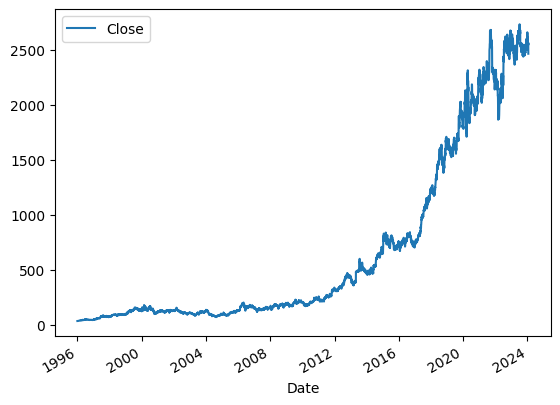

In [126]:
history.plot.line(y="Close",use_index=True)

In [127]:
# Why didnt I buy this! (crying)

In [128]:
# delete unnecessary columns
del history["Dividends"]
del history["Stock Splits"]

# Setting up our TARGET for ML

In [129]:
# creating a column for Tomorrow's Price
history["Tomorrow"]  = history["Close"].shift(-1)

# shifted all prices back one day

In [130]:
history

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1996-01-01 00:00:00+05:30,34.911102,35.121579,34.689400,34.689400,11000,35.059826
1996-01-02 00:00:00+05:30,34.689387,35.191725,34.700612,35.059826,203500,34.852150
1996-01-03 00:00:00+05:30,35.059820,34.995273,34.686574,34.852150,58000,34.854961
1996-01-04 00:00:00+05:30,34.798835,34.967216,34.742709,34.854961,111500,34.798836
1996-01-05 00:00:00+05:30,34.854962,35.023345,34.518200,34.798836,39500,34.812862
...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,2562.899902
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,2548.000000
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,2565.399902


In [131]:
# boolean indicating if tomorrow's price is greater than today's price

# then converting it to binary data for our model
history["Target"] = (history["Tomorrow"] > history["Close"]).astype(int)

In [132]:
history

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1996-01-01 00:00:00+05:30,34.911102,35.121579,34.689400,34.689400,11000,35.059826,1
1996-01-02 00:00:00+05:30,34.689387,35.191725,34.700612,35.059826,203500,34.852150,0
1996-01-03 00:00:00+05:30,35.059820,34.995273,34.686574,34.852150,58000,34.854961,1
1996-01-04 00:00:00+05:30,34.798835,34.967216,34.742709,34.854961,111500,34.798836,0
1996-01-05 00:00:00+05:30,34.854962,35.023345,34.518200,34.798836,39500,34.812862,1
...,...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,2562.899902,0
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,2548.000000,0
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,2565.399902,1


In [133]:
# only take data which is relatively naya
history = history.loc["2015-01-01":].copy()

In [134]:
history

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2015-01-01 00:00:00+05:30,653.620286,655.858449,649.187097,652.888611,372132,650.736633,0
2015-01-02 00:00:00+05:30,651.640483,659.387860,647.895939,650.736633,1207322,654.481079,1
2015-01-05 00:00:00+05:30,654.007639,655.858422,650.004807,654.481079,849252,666.876892,1
2015-01-06 00:00:00+05:30,660.248571,671.353164,650.263086,666.876892,2738679,690.291321,1
2015-01-07 00:00:00+05:30,670.578529,694.509306,670.578529,690.291321,3744143,703.332581,1
...,...,...,...,...,...,...,...
2024-01-16 00:00:00+05:30,2573.199951,2584.600098,2556.350098,2569.100098,1599406,2562.899902,0
2024-01-17 00:00:00+05:30,2549.000000,2571.350098,2539.750000,2562.899902,3047652,2548.000000,0
2024-01-18 00:00:00+05:30,2570.000000,2570.000000,2537.550049,2548.000000,1273095,2565.399902,1


# Training an initial Machine Learning Model

In [135]:
from sklearn.ensemble import RandomForestClassifier


# work by training randomparameters and average out.
# resistant to overfitting
# can pick up non-linear tendencies in the data

# for example open price is not linearly related with the target
                              # higher --> better  , optimum  ,
model = RandomForestClassifier(n_estimators=1000,min_samples_split = 100,random_state = 1)


# splitting data

# all rows till 100 in the trauning set
train = history.iloc[:-100]



# last hundred rows in the test set
test = history.iloc[-100:]




predictors = ["Close","Volume","Open","High","Low"]

model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [136]:
from sklearn.metrics import precision_score


# exam time!


preds = model.predict(test[predictors])

In [137]:
import pandas as pd
preds = pd.Series(preds,index=test.index)

In [138]:
precision_score(test["Target"],preds)

0.5633802816901409

# Making the Model Better

In [139]:
combined  = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

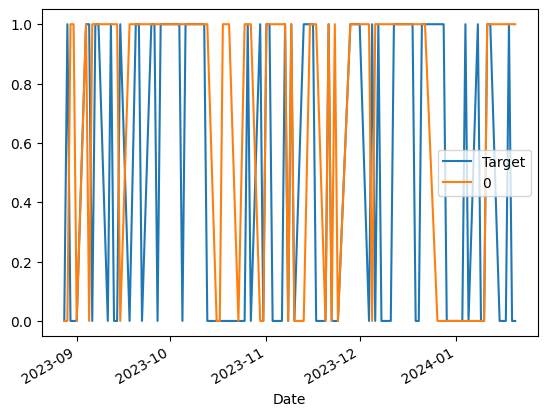

In [140]:
combined.plot()

# Building a BackTesting System

In [141]:
def predict(train,test,predictors,model):
  model.fit(train[predictors],train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds,index=test.index,name="Predictions")
  combined = pd.concat([test["Target"],preds],axis=1)
  return combined

In [142]:
def backtest(data,model,predictors,start=2500,step=250):
  # every trading year ---> 250 days
  # ten years of data
  # per year training
  # get predicitons for 10 years of data
  all_predictions = []
  for i in range(start,data.shape[0],step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train,test,predictors,model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [143]:
predictions = backtest(history,model,predictors)

ValueError: No objects to concatenate

In [ ]:
predictions["Predictions"].value_counts()